In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from google.colab import drive
drive.mount ('/content/drive')
import os
os.chdir("/content/drive/My Drive/ml-latest-small")

fileNames = os.listdir()
print(fileNames)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['ratings.csv', 'tags.csv', 'movies.csv', 'links.csv', 'README.txt', 'ratings.gsheet']


In [14]:
moviesFP = r'movies.csv'
moviesDF = pd.read_csv(moviesFP)
moviesDF.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
ratingsFP = r'ratings.csv'
ratingsDF = pd.read_csv(ratingsFP)
ratingsDF.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [16]:
tagsFP = r'tags.csv'
tagsDF = pd.read_csv(tagsFP)
tagsDF.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [17]:
# Merge all Data Files - Common Id is UserId and MovieId

tempDF = pd.merge(ratingsDF,tagsDF,on=['userId','movieId'],how='left')
mergedDF = pd.merge(tempDF,moviesDF,on=['movieId'],how='left')
mergedDF.head()

,userId,movieId,rating,timestamp_x,tag,timestamp_y,title,genres
0,1,1,4.0,964982703,NaN,NaN,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,NaN,NaN,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,NaN,NaN,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,NaN,NaN,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,NaN,NaN,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [18]:
mergedDF.describe()

,userId,movieId,rating,timestamp_x,timestamp_y
count,102677.000000,102677.000000,102677.000000,1.026770e+05,3.476000e+03
mean,327.761933,19742.712623,3.514813,1.209495e+09,1.323525e+09
std,183.211289,35884.400990,1.043133,2.170117e+08,1.731554e+08
min,1.000000,1.000000,0.500000,8.281246e+08,1.137179e+09
25%,177.000000,1199.000000,3.000000,1.019138e+09,1.138032e+09
50%,328.000000,3005.000000,3.500000,1.186590e+09,1.279956e+09
75%,477.000000,8366.000000,4.000000,1.439916e+09,1.498457e+09
max,610.000000,193609.000000,5.000000,1.537799e+09,1.537099e+09


In [19]:
genre_labels = set()
for s in mergedDF['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

print(genre_labels)

{'Crime', 'Fantasy', 'Thriller', 'Documentary', 'Children', 'Animation', 'Drama', 'War', 'Film-Noir', 'IMAX', 'Adventure', 'Western', 'Mystery', 'Action', 'Horror', 'Romance', 'Musical', 'Comedy', '(no genres listed)', 'Sci-Fi'}


In [20]:

# Convert Genres in row to Columns
# New Column is created for every genre

tempDF = moviesDF

for g in genre_labels:
    tempDF.loc[tempDF['genres'].str.contains(g), g] = 1
    tempDF[g] = tempDF[g].fillna(0)


tempDF.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,movieId,title,genres,Crime,Fantasy,Thriller,Documentary,Children,Animation,Drama,War,Film-Noir,IMAX,Adventure,Western,Mystery,Action,Horror,Romance,Musical,Comedy,(no genres listed),Sci-Fi
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
data = tempDF.iloc[:, 3:23].values
data

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
# Tugas: Implementasikan algoritma clustering untuk mengelompokkan masing-masing movie ke dalam cluster.
# Tunjukkan data dalam tabel berikut:
# MovieID, Title, Genres, Cluster
# Buat satu fungsi untuk menampilkan per cluster dari data di atas

In [30]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler() 
scaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [48]:
from sklearn.cluster import KMeans

k_range=range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(data)
    sse.append(km.inertia_)

In [49]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([8, 5, 3, ..., 1, 5, 0])

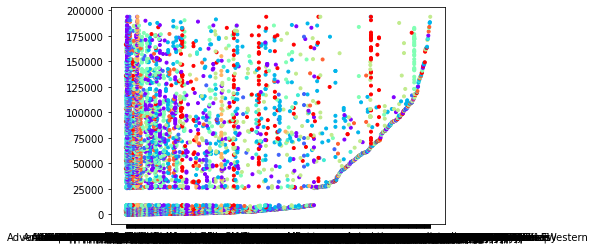

In [66]:
scaler = StandardScaler()

x1 = tempDF['genres'].values
x2 = tempDF['movieId'].values
X = np.array(list(zip(x1, x2,)))

plt.scatter(x1,x2, c=cluster.labels_, cmap='rainbow', s=9)

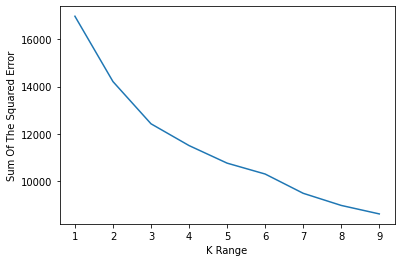

In [71]:
plt.xlabel("K Range")
plt.ylabel("Sum Of The Squared Error")
plt.plot(k_range,sse)